In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split

import os
for dirname, _, filenames in os.walk("."):
    for filename in filenames:
        print(os.path.join(dirname, filename))


.\Reviews.csv
.\TaSD_2643132.ipynb
.\.ipynb_checkpoints\TaSD_2643132-checkpoint.ipynb


In [5]:
!pip install -U click
!pip install numpy==1.21 --user
!pip install -U pip setuptools wheel
!pip install -U spacy
!python -m spacy download en_core_web_sm

  Using cached click-8.1.3-py3-none-any.whl (96 kB)
  Attempting uninstall: click
    Found existing installation: click 7.1.2
    Uninstalling click-7.1.2:
      Successfully uninstalled click-7.1.2
     --------------------------------------- 12.8/12.8 MB 10.2 MB/s eta 0:00:00
[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


# Q1. Dataset Labels and Splitting

In [6]:
# Read reviews from csv and convert to df
df = pd.read_csv('./Reviews.csv',delimiter=',')
df.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...


In [7]:
# Check if there is any data in the dataset with a null value.
df.isnull().sum()

Id                         0
ProductId                  0
UserId                     0
ProfileName               16
HelpfulnessNumerator       0
HelpfulnessDenominator     0
Score                      0
Time                       0
Summary                   27
Text                       0
dtype: int64

In [8]:
#Dropping "Na" rows
df = df.dropna()

In [9]:
#re-indexing the dataframe due to missing rows 
df = df.reset_index(drop=True)
df.shape

(568411, 10)

In [10]:
# Check the data types of the dataset.
cat_columns = df.select_dtypes(include='O').columns
df[cat_columns]
# Display the data which is "String".

,ProductId,UserId,ProfileName,Summary,Text
0,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,B00813GRG4,A1D87F6ZCVE5NK,dll pa,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""","""Delight"" says it all",This is a confection that has been around a fe...
3,B000UA0QIQ,A395BORC6FGVXV,Karl,Cough Medicine,If you are looking for the secret ingredient i...
4,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",Great taffy,Great taffy at a great price. There was a wid...
...,...,...,...,...,...
568406,B001EO7N10,A28KG5XORO54AY,Lettie D. Carter,Will not do without,Great for sesame chicken..this is a good if no...
568407,B003S1WTCU,A3I8AFVPEE8KI5,R. Sawyer,disappointed,I'm disappointed with the flavor. The chocolat...
568408,B004I613EE,A121AA1GQV751Z,"pksd ""pk_007""",Perfect for our maltipoo,"These stars are small, so you can give 10-15 o..."
568409,B004I613EE,A3IBEVCTXKNOH,"Kathy A. Welch ""katwel""",Favorite Training and reward treat,These are the BEST treats for training and rew...


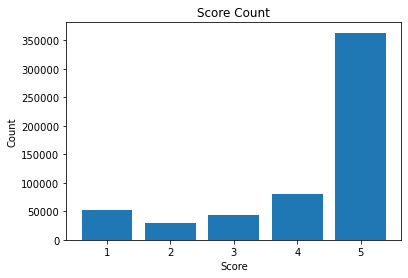

In [11]:
import matplotlib.pyplot as plt
# Plot the score count
score_counts = df['Score'].value_counts().sort_index()
plt.bar(score_counts.index, score_counts.values)
plt.title('Score Count')
plt.xlabel('Score')
plt.ylabel('Count')
plt.show()

In [12]:
#  Remove reviews with a rating of 3
df = df[df['Score'] != 3]
#re-indexing the dataframe due to missing rows 
df = df.reset_index(drop=True)
df.shape

(525773, 10)

In [13]:
# Taking a subset of the data to work on
df=df.head(5000)

In [14]:
# Split the dataset into training, validation, and test sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)
train_df, val_df = train_test_split(train_df, test_size=0.25, random_state=42)


In [15]:
# Print the label counts for each split
print("Label counts for training set:")
print(train_df['Score'].value_counts())

Label counts for training set:
5    2052
4     468
1     282
2     198
Name: Score, dtype: int64


In [16]:
print("\nLabel counts for validation set:")
print(val_df['Score'].value_counts())


Label counts for validation set:
5    683
4    145
1    121
2     51
Name: Score, dtype: int64


In [17]:
print("\nLabel counts for test set:")
print(test_df['Score'].value_counts())


Label counts for test set:
5    685
4    154
1    101
2     60
Name: Score, dtype: int64


# Q2. Data Clustering:

In [18]:
# Combine summary and text into new column words
train_df['words']=train_df['Summary']+'  '+train_df['Text']
val_df['words']=val_df['Summary']+'  '+val_df['Text']
test_df['words']=test_df['Summary']+'  '+test_df['Text']
train_df.head(10)

<ipython-input-18-a04b7cb26a0f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['words']=test_df['Summary']+'  '+test_df['Text']


,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,words
4702,5104,B004157PZI,A1OWNTA81MZ21F,Mohammed A. Zuberi,0,0,5,1311206400,Good Halal Jerky,Never had jerky before because I've never seen...,Good Halal Jerky Never had jerky before becau...
2155,2346,B002SOR6VM,A1J2TAASDRXSE6,"Tommy B. McDonell ""Tommy a doctoral candidate...",0,0,5,1293408000,Best dog food--no ear infections,Before my oldest golden started eating this fo...,Best dog food--no ear infections Before my ol...
289,316,B001EPQ0J0,A2L3IECPFB956F,D. Alger,0,0,5,1268265600,Excellent coffee,This brand of coffee has been available in my ...,Excellent coffee This brand of coffee has bee...
1822,1983,B005HGAVGA,AIG673B5G887L,AP,0,1,2,1330387200,20 of the 35 were decaf...Disapointed,I got this on the warehouse deal so I wasn't e...,20 of the 35 were decaf...Disapointed I got t...
3442,3744,B00016UX0K,A2TQFD9OIALL9M,S. Smigo,3,3,5,1254182400,Great taste!,I love this sauce. Sweet but hot too. I use it...,Great taste! I love this sauce. Sweet but hot...
521,566,B000G6RYNE,ADS5APY1NKTL4,"D. Pawl ""Dani""",7,9,5,1175040000,great (hot) new flavor....,I am a great fan of potato chips and of Thai f...,great (hot) new flavor.... I am a great fan o...
3804,4127,B001EW5YQS,A3VJZQJPSRPAR2,Pastor Glenn M Feehan,0,0,4,1333756800,Used for audience Mic pickup,Plugged direct into windows and controlled via...,Used for audience Mic pickup Plugged direct i...
678,730,B008BEGP9W,A1MJ0MF2OFIU4D,Chris,0,0,4,1340496000,A Surprising Find,I really like the pineapple shortcakes sold he...,A Surprising Find I really like the pineapple...
2294,2499,B000EIE7GQ,A31Q4BB54EL7AL,Elizabeth,3,3,5,1273017600,"Authentic taste, easy to prepare!",We love to get Masaman curry at our local Thai...,"Authentic taste, easy to prepare! We love to ..."
3623,3938,B001L1KH6Y,A2725IB4YY9JEB,"A Poeng ""SparkyGoHome""",3,3,5,1232323200,LOVE this coffee. Packs a wallop in the morning.,If I drank more than one commuter cup in the m...,LOVE this coffee. Packs a wallop in the morni...


In [20]:
!pip install numpy==1.21

In [21]:
# Data pipeline for tokenizations, stemming and stopword removal
import spacy
nlp = spacy.load('en_core_web_sm')
def text_pipeline_spacy(text):
  tokens = []
  doc = nlp(text)
  for t in doc:
    if not t.is_stop and not t.is_punct and not t.is_space:
      tokens.append(t.lemma_.lower())
  return tokens

AttributeError: module 'numpy' has no attribute 'typeDict'

In [ ]:
# Removing HTML tags from text
from bs4 import BeautifulSoup
def text_pipeline(text):
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    tokens = text_pipeline_spacy(text)
    return tokens

In [17]:
# Testing text preprocessing
from tqdm import tqdm # This provides a nice progress bar
tokens=[]
for rev in tqdm(train_df['words'].head(10)):
  tokens.append(text_pipeline(rev))

100%|██████████████████████████████████████████████████████████████████████████████████| 10/10 [00:00<00:00, 28.08it/s]


In [18]:
train_df['words'].head(10)

4702    Good Halal Jerky  Never had jerky before becau...
2155    Best dog food--no ear infections  Before my ol...
289     Excellent coffee  This brand of coffee has bee...
1822    20 of the 35 were decaf...Disapointed  I got t...
3442    Great taste!  I love this sauce. Sweet but hot...
521     great (hot) new flavor....  I am a great fan o...
3804    Used for audience Mic pickup  Plugged direct i...
678     A Surprising Find  I really like the pineapple...
2294    Authentic taste, easy to prepare!  We love to ...
3623    LOVE this coffee.  Packs a wallop in the morni...
Name: words, dtype: object

In [19]:
tokens

[['good',
  'halal',
  'jerky',
  'jerky',
  'see',
  'halal',
  'version',
  'little',
  'apprehensive',
  'find',
  'highly',
  'addictive',
  'go',
  'bag',
  'sitting',
  'recommend',
  'curious',
  'muslim',
  'brother',
  'sister',
  'try'],
 ['good',
  'dog',
  'food',
  'ear',
  'infection',
  'old',
  'golden',
  'start',
  'eat',
  'food',
  'get',
  'lot',
  'ear',
  'infection',
  'eat',
  'grain',
  'free',
  'food',
  'get',
  'dog',
  'like',
  'food',
  'coat',
  'nice',
  'shiny',
  'ear',
  'super',
  'clean',
  'recommend',
  '$',
  '1',
  'cheap',
  'site',
  'pay',
  '$',
  '18',
  'shipping',
  'wish',
  'amazon',
  '3',
  'bag',
  'time'],
 ['excellent',
  'coffee',
  'brand',
  'coffee',
  'available',
  'local',
  'store',
  'time',
  'believe',
  'company',
  'local',
  'drink',
  'time',
  'tired',
  'particularly',
  'fond',
  'turtle',
  'sundae',
  'flavor',
  'good',
  'bad',
  'turn',
  'expensive',
  'order',
  'amazon',
  'door',
  'run',
  'local',
  

In [20]:
# Step 0: Vectorise text
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.spatial.distance import cdist
import numpy as np

vectorizer = TfidfVectorizer(tokenizer=text_pipeline)
X = vectorizer.fit_transform(train_df['words'])
V = vectorizer.transform(val_df['words'])

C:\Users\Esha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
C:\Users\Esha\AppData\Local\Temp\ipykernel_2308\2743315655.py:4: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [21]:
X.shape

(3000, 10124)

In [22]:
terms = vectorizer.get_feature_names_out()
terms[1:10]

array(['"enjoy', '"i', '"i\'ll', '"if', '"mandarin', '"more', '"only',
       '"real', '"researcher'], dtype=object)

KMEANS USING SCIKIT LEARN

KMEANS OWN IMPLEMENTATION

In [23]:
# Step 1: Select k random centroids
def init_centroids(k):
    return X[np.random.choice(X.shape[0], k, replace=False), :].toarray()

# Step 2: Assign each vector to its closest centroid
def assign_clusters(centroids):
    distances = cdist(X.toarray(), centroids)
    return np.argmin(distances, axis=1)

# Step 3: Recalculate the centroids based on the closest vectors
def update_centroids(clusters, k):
    new_centroids = []
    for i in range(k):
        members = X[clusters == i].toarray()
        if members.shape[0] == 0:
            # No members in this cluster
            new_centroids.append(init_centroids(1)[0])
        else:
            new_centroids.append(members.mean(axis=0))
    return np.vstack(new_centroids)

# K-means algorithm
def kmeans(k, max_iter=500):
    centroids = init_centroids(k) 
#     print(centroids)
    for i in range(max_iter):
        clusters = assign_clusters(centroids)
        new_centroids = update_centroids(clusters, k)
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return clusters, centroids

In [24]:
# Clustering training data with k=5
clusters, centroids = kmeans(5)

In [25]:
# Print top tokens for each cluster
terms = vectorizer.get_feature_names_out()
order_centroids = centroids.argsort()[:, ::-1]
for i in range(5):
    print(f"Cluster: {i+1}", end='')
    for ind in order_centroids[i, :9]:
        print(' %s' % terms[ind], end='')
    print()

Cluster: 1 coffee tea cup hot taste good chocolate cocoa k
Cluster: 2 dog food newman love year organic treat great feed
Cluster: 3 product great mix pancake good like taste free gluten
Cluster: 4 chip bag flavor salt potato kettle great good like
Cluster: 5 good love flavor eat great taste snack cookie like


In [26]:
# Get document examples for each cluster
for i in range(5):
    cluster_docs = train_df.iloc[np.where(clusters == i)]
    print(f"Cluster {i+1} documents:")
    print(cluster_docs['Text'].head(5))
    print("\n")

Cluster 1 documents:
289     This brand of coffee has been available in my ...
3623    If I drank more than one commuter cup in the m...
4167    I am a coffee lover. It is one of the few plea...
3038    When I weigh the convenience of a K cup agains...
4778    I switched to mate from coffee a few years ago...
Name: Text, dtype: object


Cluster 2 documents:
2155    Before my oldest golden started eating this fo...
4422    My new Yorkie came from a puppy mill. She was ...
1470    I purchased this because of the good reviews a...
4400    We have a pug that suffers from chronic ear in...
4473    Newman's Own Food is one of the best on the ma...
Name: Text, dtype: object


Cluster 3 documents:
3442    I love this sauce. Sweet but hot too. I use it...
3804    Plugged direct into windows and controlled via...
678     I really like the pineapple shortcakes sold he...
2294    We love to get Masaman curry at our local Thai...
3640    I love the product.  But, the bottle design is...
Name: Text,

In [27]:
# Target Label 1: Positive sentiment reviews, Target Label 2: Negative sentiment reviews
train_df['target'] = train_df['Score'].map({1: 2, 2: 2, 3: 2, 4: 1, 5: 1})
train_df.head(5)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,words,target
4702,5104,B004157PZI,A1OWNTA81MZ21F,Mohammed A. Zuberi,0,0,5,1311206400,Good Halal Jerky,Never had jerky before because I've never seen...,Good Halal Jerky Never had jerky before becau...,1
2155,2346,B002SOR6VM,A1J2TAASDRXSE6,"Tommy B. McDonell ""Tommy a doctoral candidate...",0,0,5,1293408000,Best dog food--no ear infections,Before my oldest golden started eating this fo...,Best dog food--no ear infections Before my ol...,1
289,316,B001EPQ0J0,A2L3IECPFB956F,D. Alger,0,0,5,1268265600,Excellent coffee,This brand of coffee has been available in my ...,Excellent coffee This brand of coffee has bee...,1
1822,1983,B005HGAVGA,AIG673B5G887L,AP,0,1,2,1330387200,20 of the 35 were decaf...Disapointed,I got this on the warehouse deal so I wasn't e...,20 of the 35 were decaf...Disapointed I got t...,2
3442,3744,B00016UX0K,A2TQFD9OIALL9M,S. Smigo,3,3,5,1254182400,Great taste!,I love this sauce. Sweet but hot too. I use it...,Great taste! I love this sauce. Sweet but hot...,1


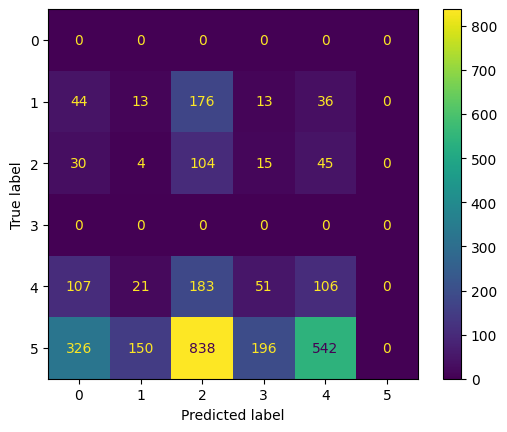

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

target_labels = train_df['Score']

# Assign target labels to each cluster
assigned_labels = []
for i in range(5):
    cluster_indices = np.where(clusters == i)[0]
    cluster_target_labels = clusters[cluster_indices]
    assigned_label = np.bincount(cluster_target_labels).argmax()
    assigned_labels.append(assigned_label)

# Construct confusion matrix
conf_matrix = confusion_matrix(target_labels, [assigned_labels[c] for c in clusters])
ConfusionMatrixDisplay(confusion_matrix=conf_matrix).plot()

# Q3. Comparing Classifiers

In [39]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.dummy import DummyClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import string

# # create feature matrix and target vector
vectorizer = TfidfVectorizer(tokenizer=text_pipeline)
X_train_tfidf = X
X_val_tfidf = V

vectorizer = CountVectorizer()
X_train_count = vectorizer.fit_transform(train_df['words'])
X_val_count = vectorizer.transform(val_df['words'])

y_train = train_df["Score"]
y_val = val_df["Score"]

In [40]:
# evaluate performance
def evaluate_model(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='macro')
    recall = recall_score(y_true, y_pred, average='macro')
    f1 = f1_score(y_true, y_pred, average='macro')
    return accuracy, precision, recall, f1

In [48]:
# 1. Dummy Classifier with strategy="most_frequent"
dummy_most_frequent = DummyClassifier(strategy="most_frequent")
dummy_most_frequent.fit(X_train_count, y_train)
y_pred_dummy_most_frequent = dummy_most_frequent.predict(X_val_count)

# 2. Dummy Classifier with strategy="stratified"
dummy_stratified = DummyClassifier(strategy="stratified")
dummy_stratified.fit(X_train_count, y_train)
y_pred_dummy_stratified = dummy_stratified.predict(X_val_count)

# 3. LogisticRegression with One-hot vectorization
lr_count = LogisticRegression(max_iter=10000)
lr_count.fit(X_train_count, y_train)
y_pred_lr_count = lr_count.predict(X_val_count)

# 4. LogisticRegression with TF-IDF vectorization
lr_tfidf = LogisticRegression(max_iter=10000)
lr_tfidf.fit(X_train_tfidf, y_train)
y_pred_lr_tfidf = lr_tfidf.predict(X_val_tfidf)

# 5. SVC Classifier with One-hot vectorization
svc_count = SVC()
svc_count.fit(X_train_count, y_train)
y_pred_svc_count = svc_count.predict(X_val_count)

In [50]:
# Evaluate models on training set
models = {
    "Most Frequent": dummy_most_frequent,
    "Stratified": dummy_stratified,
    "LR Count": lr_count,
#     "LR TF-IDF": lr_tfidf,
    "SVC Count": svc_count,
}

train_scores = []
for name, model in models.items():
    y_pred_train = model.predict(X_train_count)
    scores_train = evaluate_model(y_train, y_pred_train)
    train_scores.append([name] + list(scores_train))

# Evaluate models on validation set
val_scores = []
for name, model in models.items():
    if name == "LR Count":
        X_val = X_val_count
    elif name == "LR TF-IDF":
        X_val = X_val_tfidf
    else:
        X_val = X_val_count
    y_pred_val = model.predict(X_val)
    scores_val = evaluate_model(y_val, y_pred_val)
    val_scores.append([name] + list(scores_val))

# Print evaluation metrics
print("Training Set Performance")
print("========================")
print(pd.DataFrame(train_scores, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1"]))

print("\nValidation Set Performance")
print("==========================")
df_val_scores = pd.DataFrame(val_scores, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1"])
df_val_scores.set_index("Classifier", inplace=True)
df_val_scores = df_val_scores.round(3)
print(df_val_scores)



C:\Users\Esha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Esha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Training Set Performance
      Classifier  Accuracy  Precision    Recall        F1
0  Most Frequent  0.684000   0.171000  0.250000  0.203088
1     Stratified  0.500667   0.254265  0.254408  0.254320
2       LR Count  0.998000   0.999271  0.996795  0.998022
3      SVC Count  0.793667   0.938475  0.516691  0.606324

Validation Set Performance
               Accuracy  Precision  Recall     F1
Classifier                                       
Most Frequent     0.683      0.171   0.250  0.203
Stratified        0.525      0.241   0.243  0.242
LR Count          0.741      0.574   0.541  0.552
SVC Count         0.696      0.650   0.276  0.253


C:\Users\Esha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
# Random Forest Classifier with TF-IDF vectorization:
from sklearn.ensemble import RandomForestClassifier
rf_tfidf = RandomForestClassifier()
rf_tfidf.fit(X_train_tfidf, y_train)
y_pred_rf_tfidf_train = rf_tfidf.predict(X_train_tfidf)
y_pred_rf_tfidf_val = rf_tfidf.predict(X_val_tfidf)

In [63]:
# Evaluate on training set
train_scores = []
for name, model in [("Most Frequent", dummy_most_frequent),
                    ("Stratified", dummy_stratified),
                    ("LR Count", lr_count),
#                     ("LR TF-IDF", lr_tfidf),
                    ("SVC Count", svc_count),
                    ("RF TF-IDF", rf_tfidf)]:
    if name == "RF TF-IDF":
        X_train = X_train_tfidf
        y_train_pred = y_pred_rf_tfidf_train
    else:
        X_train = X_train_count
        y_train_pred = model.predict(X_train_count)
    scores_train = evaluate_model(y_train, y_train_pred)
    train_scores.append([name] + list(scores_train))
    
# Evaluate on validation set
val_scores = []
for name, model in [("Most Frequent", dummy_most_frequent),
                    ("Stratified", dummy_stratified),
                    ("LR Count", lr_count),
                    ("LR TF-IDF", lr_tfidf),
                    ("SVC Count", svc_count),
                    ("RF TF-IDF", rf_tfidf)]:
    if name == "LR Count" or name == "SVC Count":
        X_val = X_val_count
    elif name == "LR TF-IDF" or name == "RF TF-IDF":
        X_val = X_val_tfidf
    else:
        X_val = X_val_count
    y_pred_val = model.predict(X_val)
    scores_val = evaluate_model(y_val, y_pred_val)
    val_scores.append([name] + list(scores_val))
    

# Print evaluation metrics
print("\nTraining Set Performance")
print("========================")
df_train_scores = pd.DataFrame(train_scores, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1"])
df_train_scores.set_index("Classifier", inplace=True)
df_train_scores = df_train_scores.round(3)
print(df_train_scores)

print("\nValidation Set Performance")
print("==========================")
df_val_scores = pd.DataFrame(val_scores, columns=["Classifier", "Accuracy", "Precision", "Recall", "F1"])
df_val_scores.set_index("Classifier", inplace=True)
df_val_scores = df_val_scores.round(3)
print(df_val_scores)


C:\Users\Esha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Esha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



Training Set Performance
               Accuracy  Precision  Recall     F1
Classifier                                       
Most Frequent     0.684      0.171   0.250  0.203
Stratified        0.502      0.239   0.240  0.240
LR Count          0.998      0.999   0.997  0.998
SVC Count         0.794      0.938   0.517  0.606
RF TF-IDF         1.000      1.000   1.000  1.000

Validation Set Performance
               Accuracy  Precision  Recall     F1
Classifier                                       
Most Frequent     0.683      0.171   0.250  0.203
Stratified        0.493      0.256   0.258  0.256
LR Count          0.741      0.574   0.541  0.552
LR TF-IDF         0.707      0.465   0.327  0.337
SVC Count         0.696      0.650   0.276  0.253
RF TF-IDF         0.703      0.865   0.296  0.284


C:\Users\Esha\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: title={'center': 'Performance of LR Count on Validation Set'}>

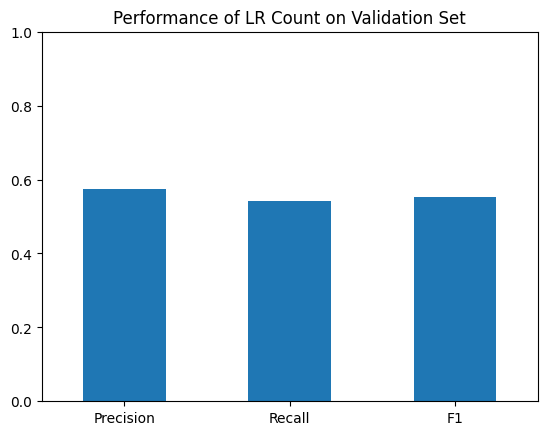

In [64]:
# Plot F1 scores for best performing classifier
best_classifier = df_val_scores["F1"].idxmax()
f1_scores = df_val_scores.loc[best_classifier, ["Precision", "Recall", "F1"]]
f1_scores.index = ["Precision", "Recall", "F1"]
f1_scores.plot(kind="bar", ylim=[0, 1], rot=0, title=f"Performance of {best_classifier} on Validation Set")

In [66]:
import matplotlib.pyplot as plt
import numpy as np

# Define classes
classes = ['negative', 'positive']

# Get F1 scores for each class
f1_scores = evaluate_model(y_val, y_pred_lr_count)['f1_by_class']

# Plot bar chart
fig, ax = plt.subplots()
ax.bar(classes, f1_scores)
ax.set_xlabel('Class')
ax.set_ylabel('F1 Score')
ax.set_ylim([0, 1])
ax.set_title('F1 Score by Class')

# Add labels to bars
for i, v in enumerate(f1_scores):
    ax.text(i, v + 0.01, str(round(v, 2)), ha='center')

plt.show()


TypeError: tuple indices must be integers or slices, not str

# Q4. Parameter Tuning

In [68]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# define the parameter grid to search over
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'tfidf__sublinear_tf': [True, False],
    'tfidf__max_features': [None, 5000, 10000, 20000, 50000],
    'tfidf__ngram_range': [(1, 1), (1, 2), (1, 3)]
}

# initialise the vectorizer and classifier
tfidf = TfidfVectorizer()
lr = LogisticRegression(max_iter=10000)

# create the pipeline
pipeline = Pipeline([
    ('tfidf', tfidf),
    ('lr', lr)
])

# create the GridSearchCV object
grid_search = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# fit the GridSearchCV object to the data
grid_search.fit(X_train, y_train)

# print the best parameters and the corresponding score
print('Best parameters:', grid_search.best_params_)
print('Best score:', grid_search.best_score_)

# get the predictions on the validation set
y_pred = grid_search.predict(X_val)

# evaluate the performance of the tuned model
accuracy, precision, recall, f1 = evaluate_model(y_val, y_pred)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1 score:', f1)


ValueError: Invalid parameter 'C' for estimator Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('lr', LogisticRegression(max_iter=10000))]). Valid parameters are: ['memory', 'steps', 'verbose'].

# Q5. Context vectors using BERT

SyntaxError: invalid syntax (191885880.py, line 1)